In [53]:
# !wget --user-agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36" -O data.csv 'https://datadryad.org/stash/downloads/file_stream/67671'

In [1]:
pip install scanpy anndata squidpy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import scanpy as sc
import anndata as ad
import squidpy as sq
import scipy.sparse as sp
from scipy.cluster import hierarchy as sch
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('data.csv', index_col=0)

In [5]:
gene_counts_df = data.iloc[:,8:]
gene_counts_df = gene_counts_df.reset_index(drop=True)
gene_counts_df

Ace2   Adora2a    Aldh1l1    Amigo2      Ano3       Aqp4        Ar  \
0         0.0  1.638275  21.299750  0.000000  1.638275  16.382010  0.000000   
1         0.0  0.000000   1.578873  0.000000  0.789452   0.789452  1.578873   
2         0.0  0.000000   2.701349  5.402654  0.000000   0.000000  0.000000   
3         0.0  0.000000   1.845116  0.922560  0.000000   0.922560  0.922560   
4         0.0  0.000000   6.352415  0.000000  0.000000   3.176188  3.176188   
...       ...       ...        ...       ...       ...        ...       ...   
1027843   0.0  0.000000   0.000000  1.326751  0.000000   0.000000  5.307104   
1027844   0.0  0.000000   2.663616  5.327177  0.000000   0.000000  2.663616   
1027845   0.0  0.000000   2.076664  2.076664  0.000000   0.000000  2.076664   
1027846   0.0  0.000000  14.513150  0.000000  0.000000   0.000000  0.000000   
1027847   0.0  0.000000   0.000000  0.000000  0.000000   0.000000  0.000000   

          Arhgap36    Avpr1a     Avpr2  ...      Penk      Scg2       Sln  \
0         0.000000  0.000000  0.000000  ...  0.133016  0.000000  0.865263   
1         0.789452  0.000000  0.000000  ...  0.000000  0.000000  0.277939   
2         2.701349  0.000000  0.000000  ...  0.213939  0.000000  0.377907   
3         0.922560  0.000000  0.000000  ...  0.050882  0.089038  0.000000   
4         3.176188  0.000000  0.000000  ...  1.250661  0.159618  0.211159   
...            ...       ...       ...  ...       ...       ...       ...   
1027843   1.326751  1.326751  1.326751  ...  0.000000  0.000000  0.000000   
1027844  31.960971  0.000000  0.000000  ...  0.000000  0.852081  0.000000   
1027845   0.000000  2.076664  0.000000  ...  0.058011  0.000000  0.000000   
1027846  14.513150  0.000000  0.000000  ...  0.000000  0.326172  0.000000   
1027847   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

              Sst      Tac1      Tac2        Th       Trh      Ucn3       Vgf  
0        0.002977  0.054826  0.008934  0.000000  0.000000  0.000000  0.000000  
1        0.868702  0.580957  0.010079  0.000000  0.000000  0.000000  0.000000  
2        0.049332  0.084898  0.008951  0.000000  0.000000  0.000000  0.000000  
3        0.000000  0.001530  0.031364  0.000000  0.000000  0.000000  0.001138  
4        0.000000  0.087730  0.000000  0.000000  0.000000  0.000000  0.029419  
...           ...       ...       ...       ...       ...       ...       ...  
1027843  0.000000  0.000000  0.040998  0.000000  0.000000  0.024618  0.000000  
1027844  0.695548  0.000000  0.024392  0.475944  0.000000  0.000000  0.000000  
1027845  0.000000  0.000000  0.061898  0.000000  0.000000  0.000000  0.000000  
1027846  0.000000  0.000000  0.063518  0.000000  0.000000  0.000000  0.000000  
1027847  0.026406  0.007543  0.069503  0.000000  0.026432  0.000000  0.000000  

[1027848 rows x 161 columns]

In [6]:
#list(adata.var_names)
# extracting blank genes and making sure only 5 blank found
blank_genes =[]
for i in gene_counts_df.columns:
    if 'Blank' in i :
        blank_genes.append(i)
blank_genes

['Blank_1', 'Blank_2', 'Blank_3', 'Blank_4', 'Blank_5']

In [7]:
# droping blank_genes
# Remove the specified genes from the gene count matrix
keep_genes = [gene for gene in gene_counts_df.columns if gene not in blank_genes]
gene_counts_df = gene_counts_df[keep_genes]
gene_metadata_df = pd.DataFrame(index=gene_counts_df.columns.tolist())
gene_counts_df = gene_counts_df[keep_genes]
gene_metadata_df = gene_metadata_df.loc[keep_genes]


In [8]:
cell_meta_data_df = data.iloc[:,:8]

In [25]:
adata = sc.AnnData(X=gene_counts_df.values, obs=cell_meta_data_df, var=gene_metadata_df)

NameError: name 'gene_counts_df' is not defined

In [26]:
adata

AnnData object with n_obs × n_vars = 28317 × 155
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'n_counts', 'n_genes_by_counts', 'total_counts', 'Leiden'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'Leiden', 'Leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'spatial_neighbors', 'Leiden_nhood_enrichment'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

# subset of the requied Bregma tissue sections -0.04, -0.09, -0.14, -0.19, and -0.24 mm

In [27]:
spatial_cell_coordinates = cell_meta_data_df[['Centroid_X', 'Centroid_Y']].values
adata.obsm['spatial'] = np.transpose(spatial_cell_coordinates.transpose())

NameError: name 'cell_meta_data_df' is not defined

In [28]:
# Subset the AnnData object based on the required Bregma sections
required_sections = (
    (adata.obs['Bregma'] == -0.04) |
    (adata.obs['Bregma'] == -0.09) |
    (adata.obs['Bregma'] == -0.14) |
    (adata.obs['Bregma'] == -0.19) |
    (adata.obs['Bregma'] == -0.24)
)

# Apply the filter to the AnnData object
adata = adata[required_sections]
# filter all animal exept animal 1
adata=adata[adata.obs['Animal_ID']==1]
# removing cells that are ammbiguous
adata=adata[adata.obs['Cell_class']!='Ambiguous']

In [29]:
print((adata.obs['Animal_sex'].value_counts(),adata.obs['Bregma'].value_counts()))


(Animal_sex
Female    28317
Name: count, dtype: int64, Bregma
-0.14    5926
-0.19    5803
-0.09    5557
-0.24    5543
-0.04    5488
Name: count, dtype: int64)


In [30]:
adata

View of AnnData object with n_obs × n_vars = 28317 × 155
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'n_counts', 'n_genes_by_counts', 'total_counts', 'Leiden'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'Leiden', 'Leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'spatial_neighbors', 'Leiden_nhood_enrichment'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

i removed the blank genes idetified in the moffit paper and removed the ambiguous cells as they were identified as putative doublets 

# QC

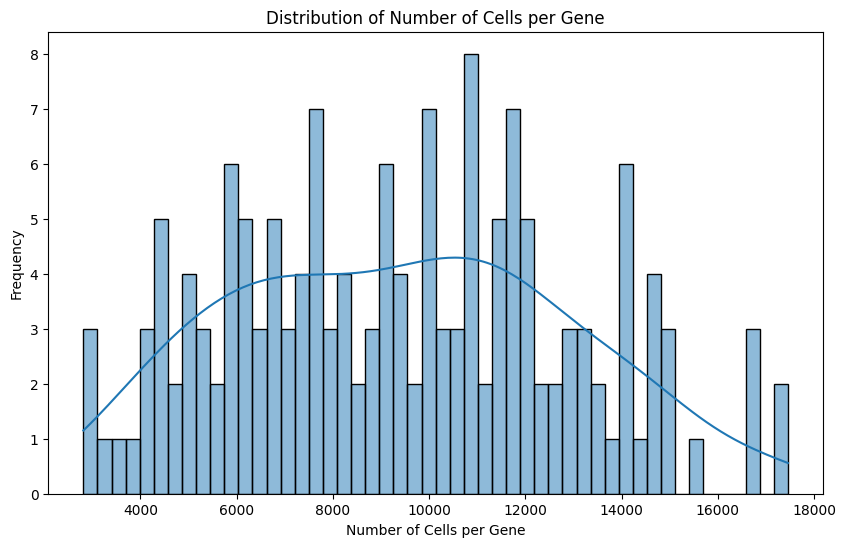

In [31]:
# Calculate number of cells per gene
cells_per_gene = (adata.X > 0).sum(axis=0)


# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(cells_per_gene, bins=50, kde=True)
plt.xlabel('Number of Cells per Gene')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Cells per Gene')
plt.show()


In [32]:
sc.pp.filter_genes(adata, min_cells=3, inplace=True)
sc.pp.filter_cells(adata, min_counts=1, inplace=True)
# enuring we dob't have empty cells

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:282: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [33]:
adata

AnnData object with n_obs × n_vars = 15657 × 155
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'n_counts', 'n_genes_by_counts', 'total_counts', 'Leiden'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'Leiden', 'Leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'spatial_neighbors', 'Leiden_nhood_enrichment'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

# preprocessing

<Axes: title={'center': 'Unique transcripts per cell'}, xlabel='n_genes_by_counts', ylabel='Count'>

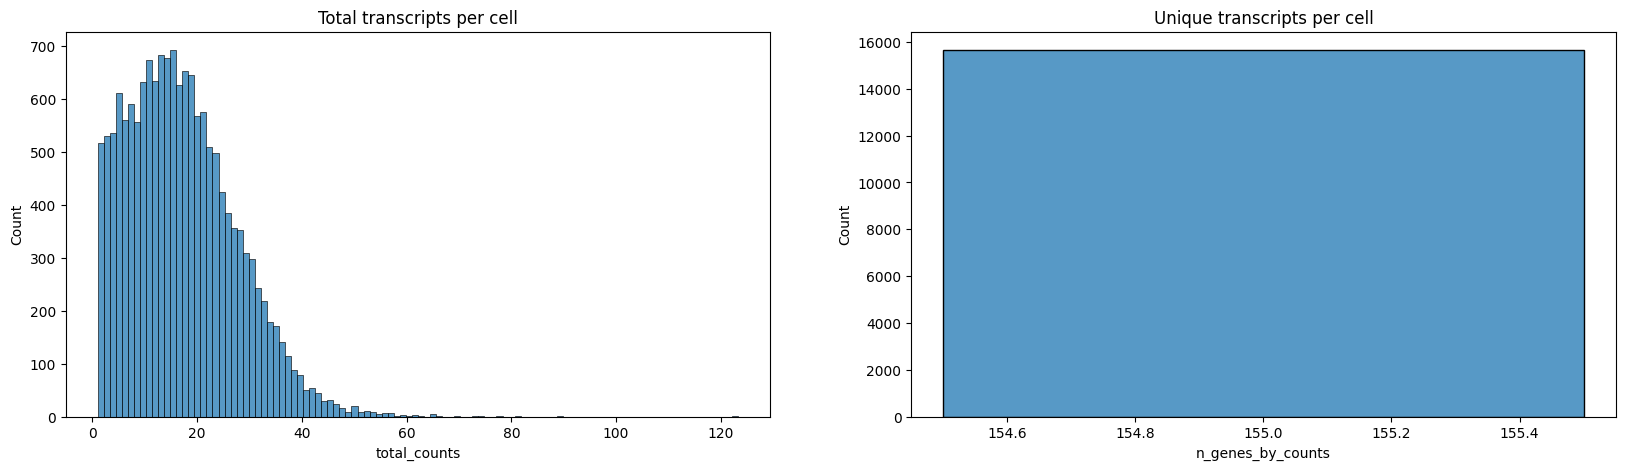

In [34]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)

# normaliztion

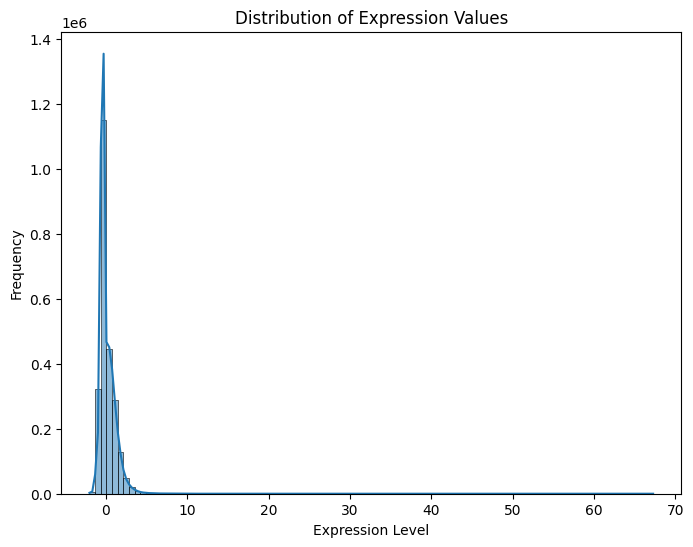

In [35]:
# Plot the distribution of expression values
plt.figure(figsize=(8, 6))
sns.histplot(adata.X.flatten(), bins=100, kde=True)
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.title("Distribution of Expression Values")
plt.show()


In [20]:
# sc.pp.normalize_total(adata, inplace=True) # Normalize counts per cell
# sc.pp.log1p(adata) # Logarithmize the data matrix
sc.pp.scale(adata)

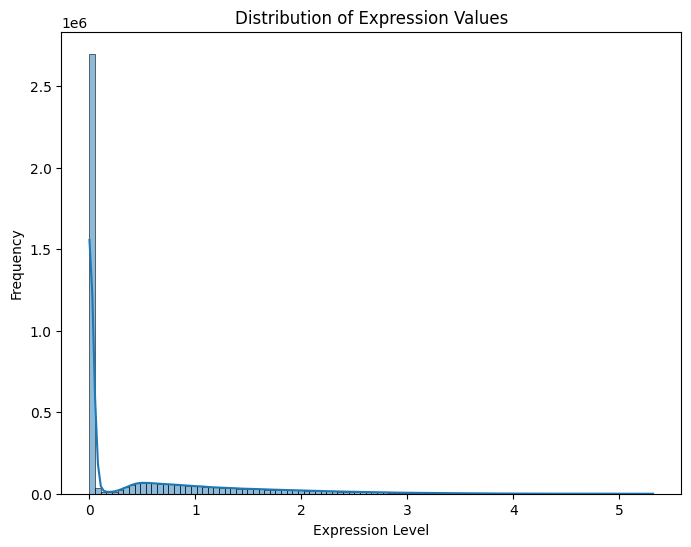

In [22]:
# Plot the distribution of expression values
plt.figure(figsize=(8, 6))
sns.histplot(adata.X.flatten(), bins=100, kde=True)
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.title("Distribution of Expression Values")
plt.show()


<Axes: title={'center': 'Unique transcripts per cell'}, xlabel='n_genes_by_counts', ylabel='Count'>

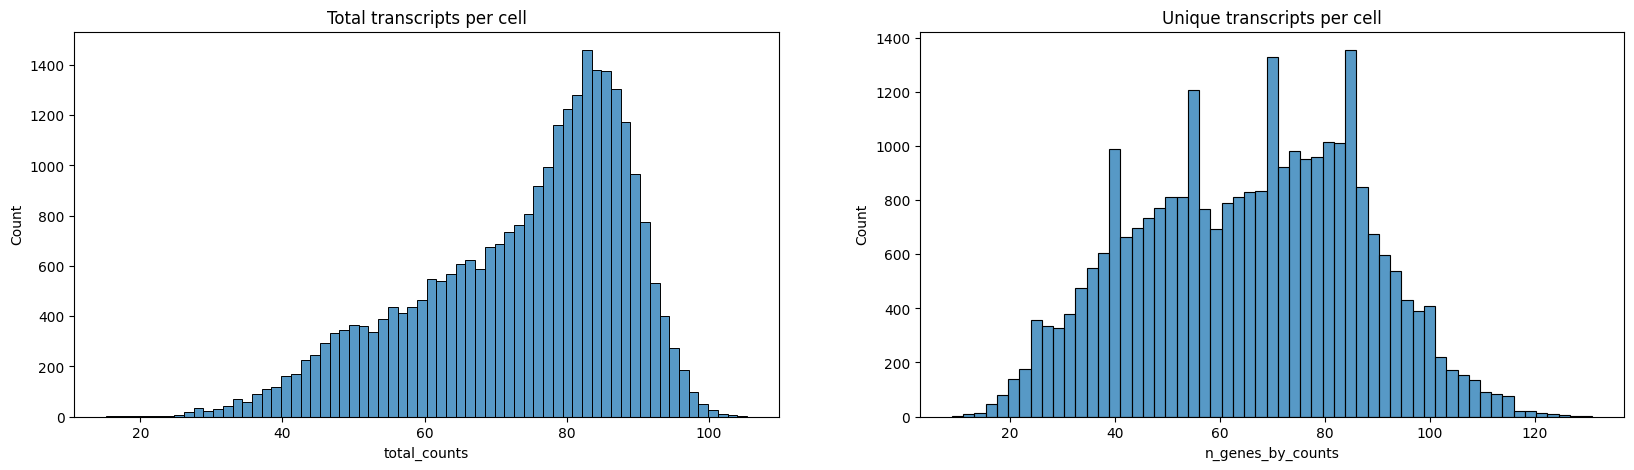

In [23]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)

... storing 'Animal_sex' as categorical
... storing 'Behavior' as categorical
... storing 'Cell_class' as categorical
... storing 'Neuron_cluster_ID' as categorical


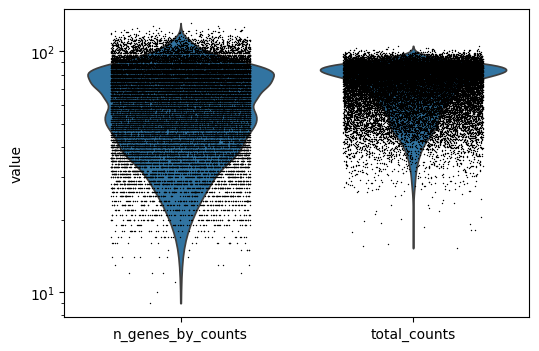

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.3, stripplot=True, log=True, ax=axs)

# clustering

In [21]:
def BasicScanpyPreprocessing(adata, resolution=None, n_comps=50):
    sc.pp.pca(adata, n_comps=n_comps)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    sc.tl.leiden(adata, key_added="Leiden",resolution=resolution)
    return adata

In [22]:
BasicScanpyPreprocessing(adata, resolution=0.65)

AnnData object with n_obs × n_vars = 28317 × 155
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'n_counts', 'n_genes_by_counts', 'total_counts', 'Leiden'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'Leiden', 'Leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'spatial_neighbors', 'Leiden_nhood_enrichment'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

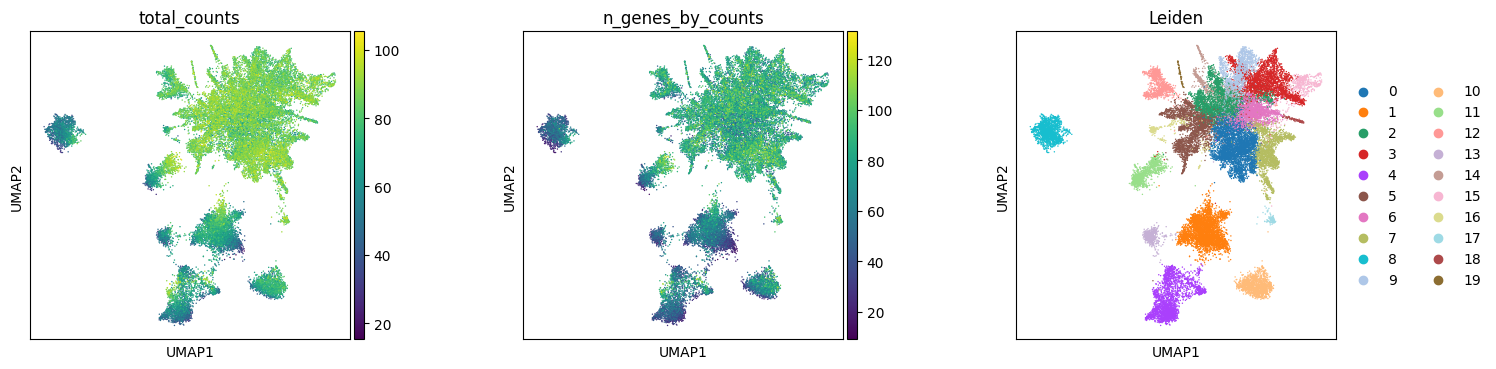

In [23]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "Leiden"], wspace=0.4)

In [ ]:
# saving the adata
adata.write("adata.h5ad")

# exploration of the data

In [3]:
adata = ad.read_h5ad("adata.h5ad")

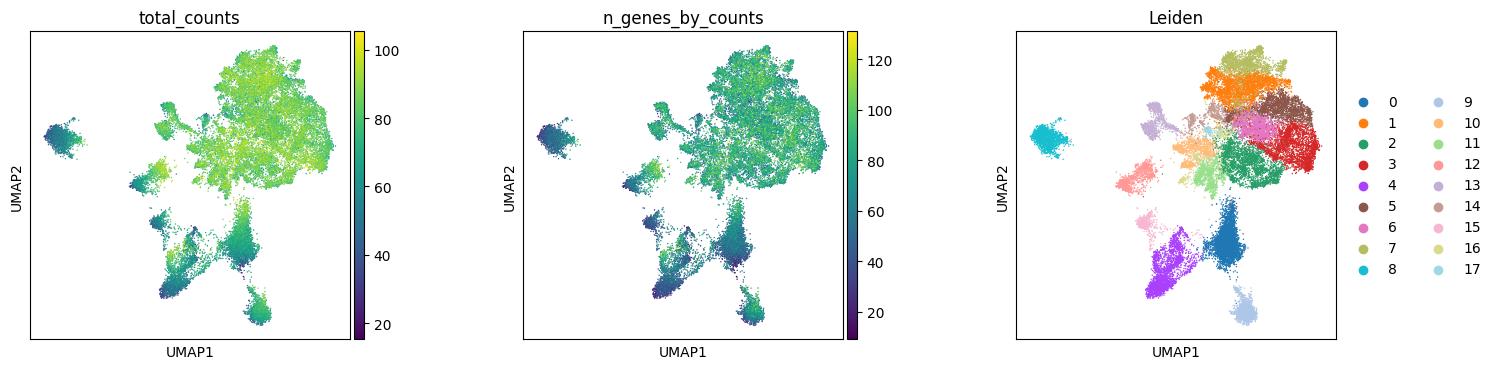

In [17]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "Leiden"], wspace=0.4)

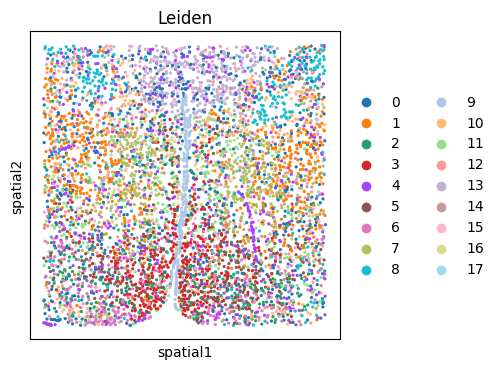

In [18]:
sc.pl.embedding(adata[adata.obs['Bregma']==-0.24], basis='spatial', color='Leiden')

In [7]:
adata

AnnData object with n_obs × n_vars = 28317 × 155
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'n_counts', 'n_genes_by_counts', 'total_counts', 'Leiden'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Leiden', 'Leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarni

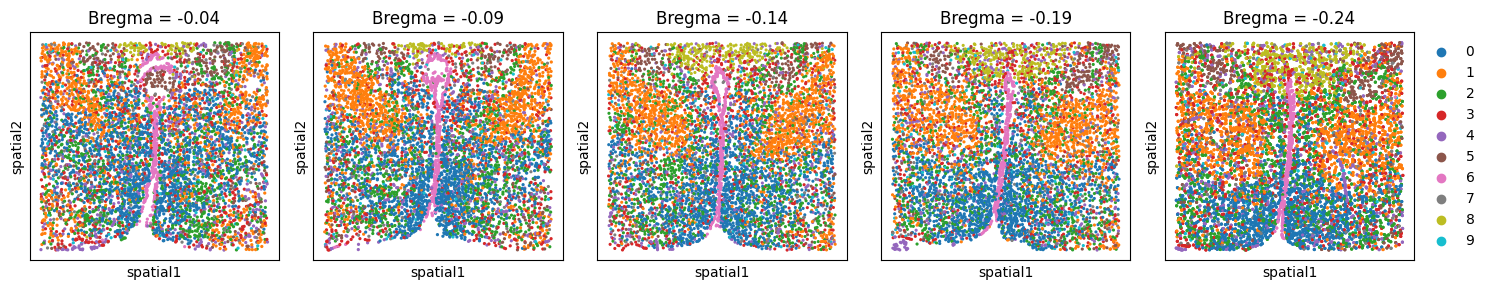

In [9]:
# ploting identified clusters of the paper
bregma_sections = [-0.04, -0.09, -0.14, -0.19, -0.24]

# Create subplots (one column per Bregma section)
fig, axs = plt.subplots(1, len(bregma_sections), figsize=(15, 3))

# Plot each Bregma section
for i, bregma in enumerate(bregma_sections):
    # Filter data for the current Bregma section
    adata_section = adata[adata.obs['Bregma'] == bregma]
    
    # Plot embedding
    sc.pl.embedding(adata_section, basis="spatial", color="Leiden", ax=axs[i], show=False, legend_loc=None)
    
    # Set title for each subplot
    axs[i].set_title(f'Bregma = {bregma}')
    
sc.pl.embedding(adata[adata.obs['Bregma']==-0.24], basis="spatial", color="Leiden", ax=axs[4], show=False)
axs[4].set_title('Bregma = -0.24')
# Adjust layout
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


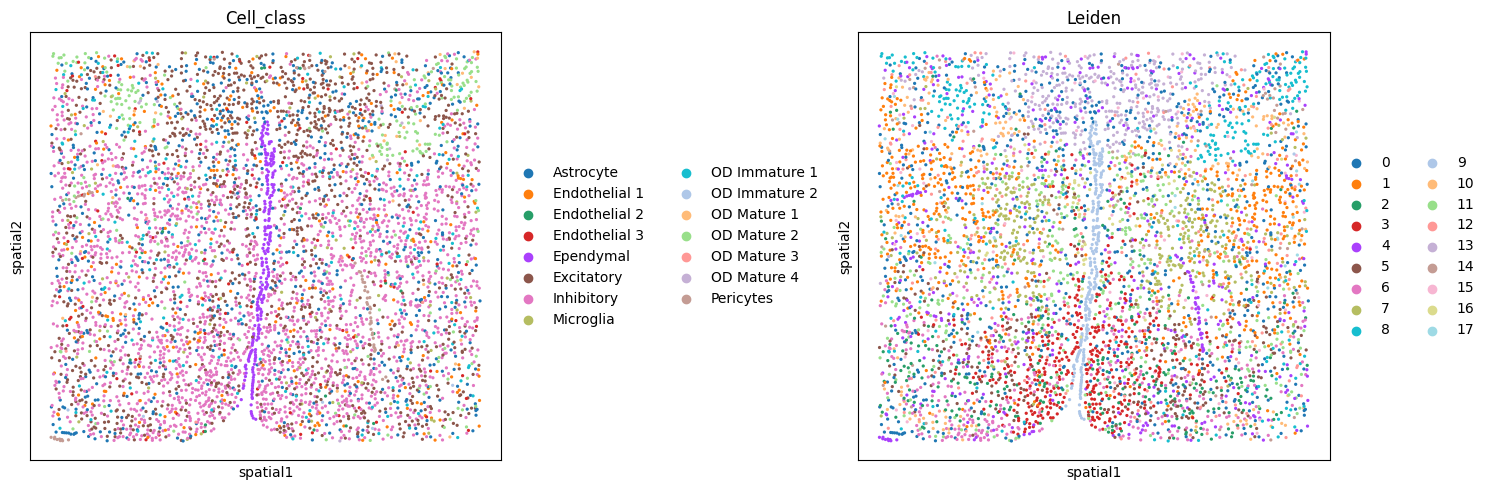

In [34]:
# comparing umap identified clusters with cell id
fig, axe = plt.subplots(1, 2, figsize=(15, 5))

sc.pl.embedding(adata[adata.obs['Bregma']==-0.24], basis='spatial', color='Cell_class', ax=axe[0], show=False)
axe[0].set_title('Cell_class')

sc.pl.embedding(adata[adata.obs['Bregma']==-0.24], basis='spatial', color='Leiden', ax=axe[1], show=False)
axe[1].set_title('Leiden')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


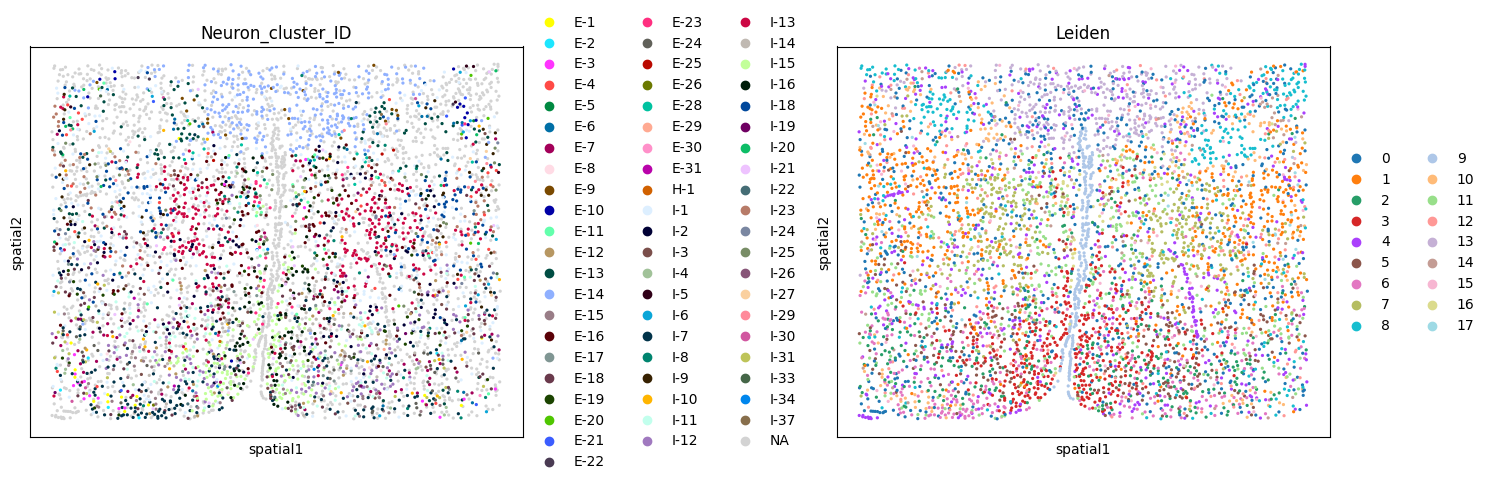

In [35]:
# comparing umap identified clusters with cell id
fig, axe = plt.subplots(1, 2, figsize=(15, 5))

sc.pl.embedding(adata[adata.obs['Bregma']==-0.24], basis='spatial', color='Neuron_cluster_ID', ax=axe[0], show=False)
axe[0].set_title('Neuron_cluster_ID')

sc.pl.embedding(adata[adata.obs['Bregma']==-0.24], basis='spatial', color='Leiden', ax=axe[1], show=False)
axe[1].set_title('Leiden')

plt.tight_layout()
plt.show()

In [11]:
# ploting tissue based on clusters
def plotClustes(adata, groups):

    fig, axs = plt.subplots(1, len(groups), figsize=(15, 3))

    for i, cluster in enumerate(groups):

        # Plot embedding
        sc.pl.embedding(adata[adata.obs['Bregma']==-0.14], basis="spatial", color="Leiden",groups=str(cluster),size= 60, ax=axs[i], show=False, legend_loc=None)

        # Set title for each subplot
        axs[i].set_title(f'cluster = {cluster}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarni

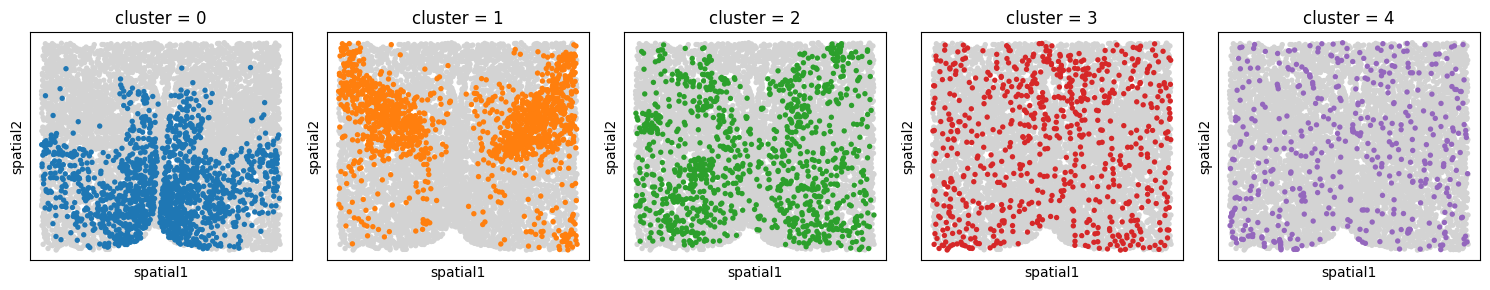

In [12]:
plotClustes(adata,[0,1,2,3,4])

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarni

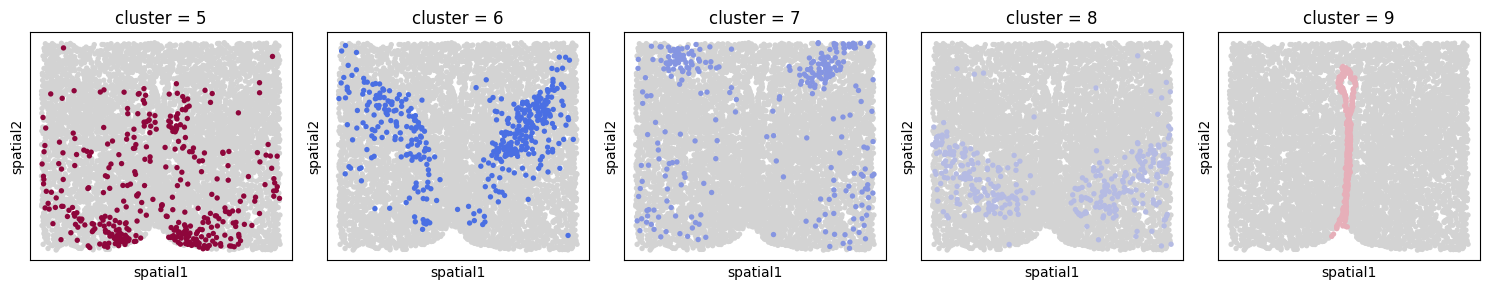

In [28]:
plotClustes(adata,[5,6,7,8,9])

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarni

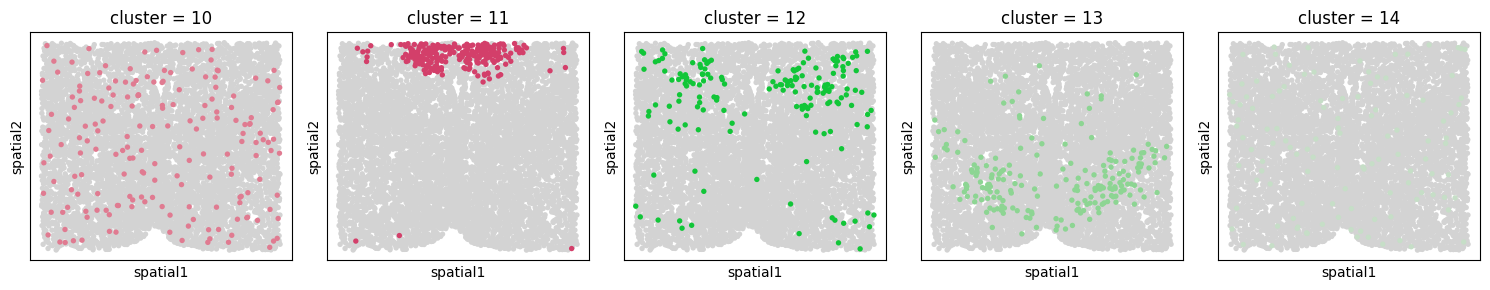

In [31]:
plotClustes(adata,[10,11,12,13,14])

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarni

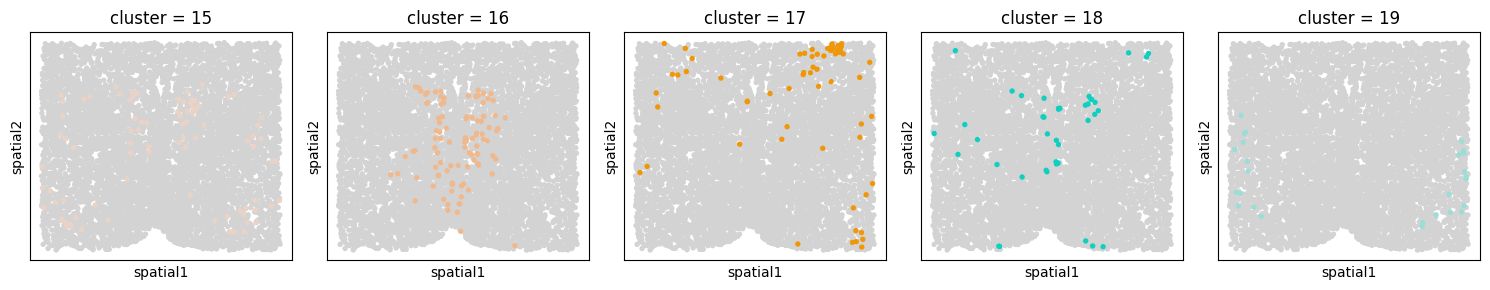

In [30]:
plotClustes(adata,[15,16,17,18, 19])


In [125]:
adata

AnnData object with n_obs × n_vars = 28317 × 155
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'n_counts', 'n_genes_by_counts', 'total_counts', 'Leiden'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Leiden', 'Leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

  0%|          | 0/1000 [00:00<?, ?/s]

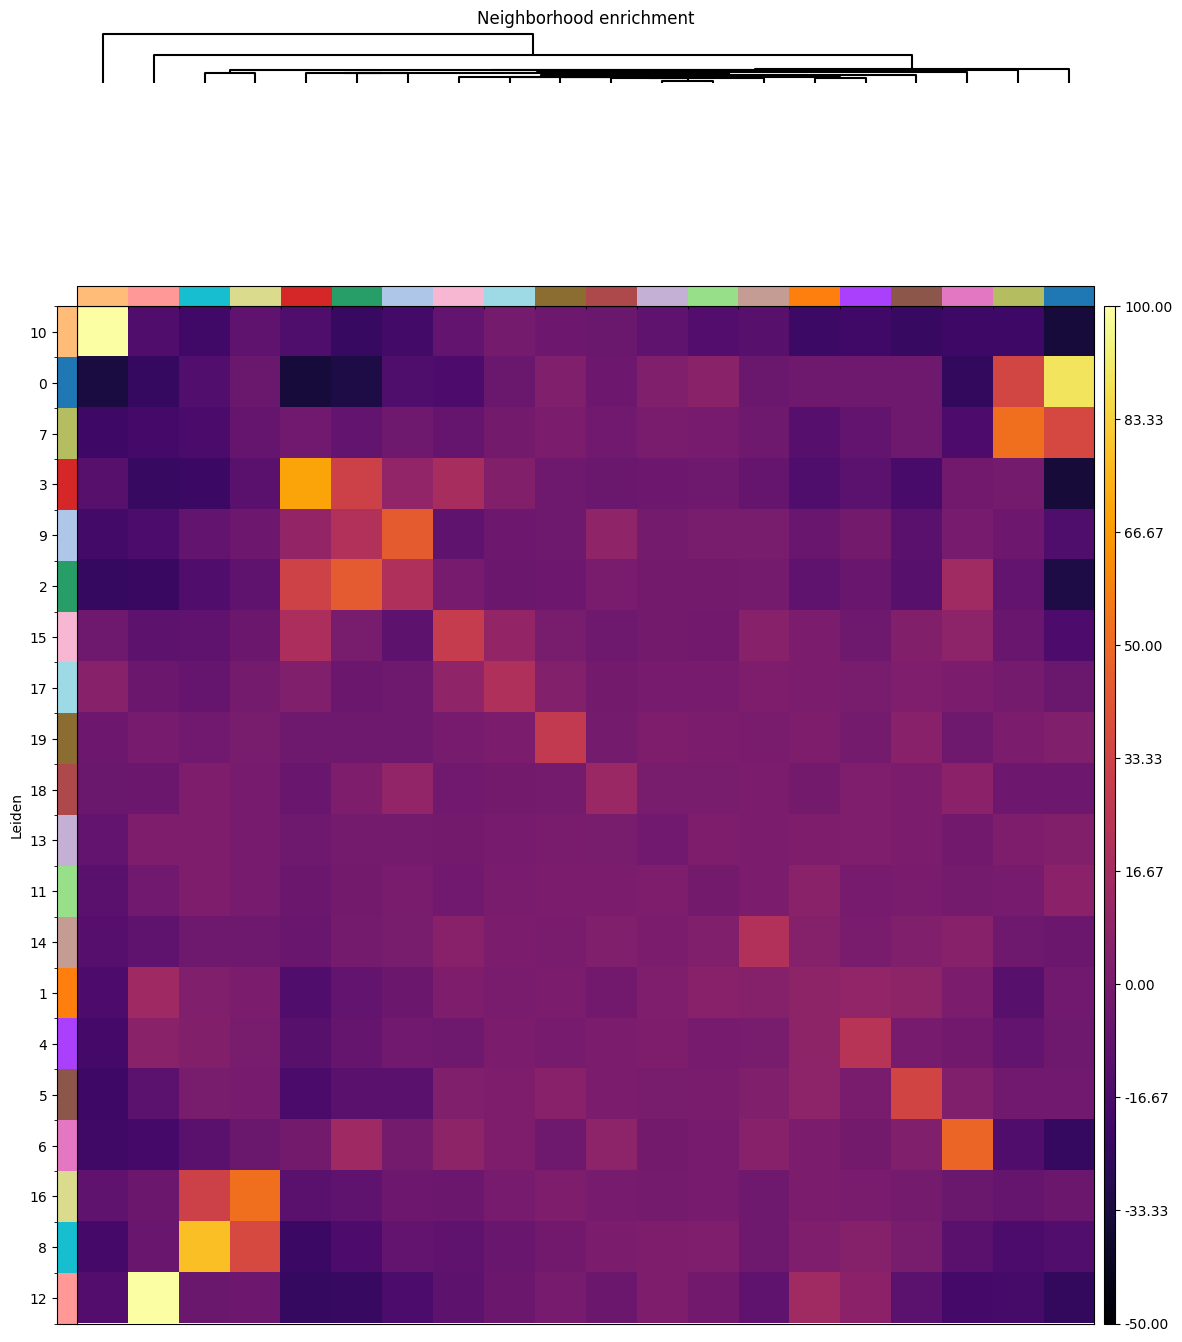

In [24]:
sq.gr.spatial_neighbors(adata, coord_type="generic", spatial_key="spatial")
sq.gr.nhood_enrichment(adata, cluster_key="Leiden")
sq.pl.nhood_enrichment(
    adata, cluster_key="Leiden", method="single", cmap="inferno", vmin=-50, vmax=100
)

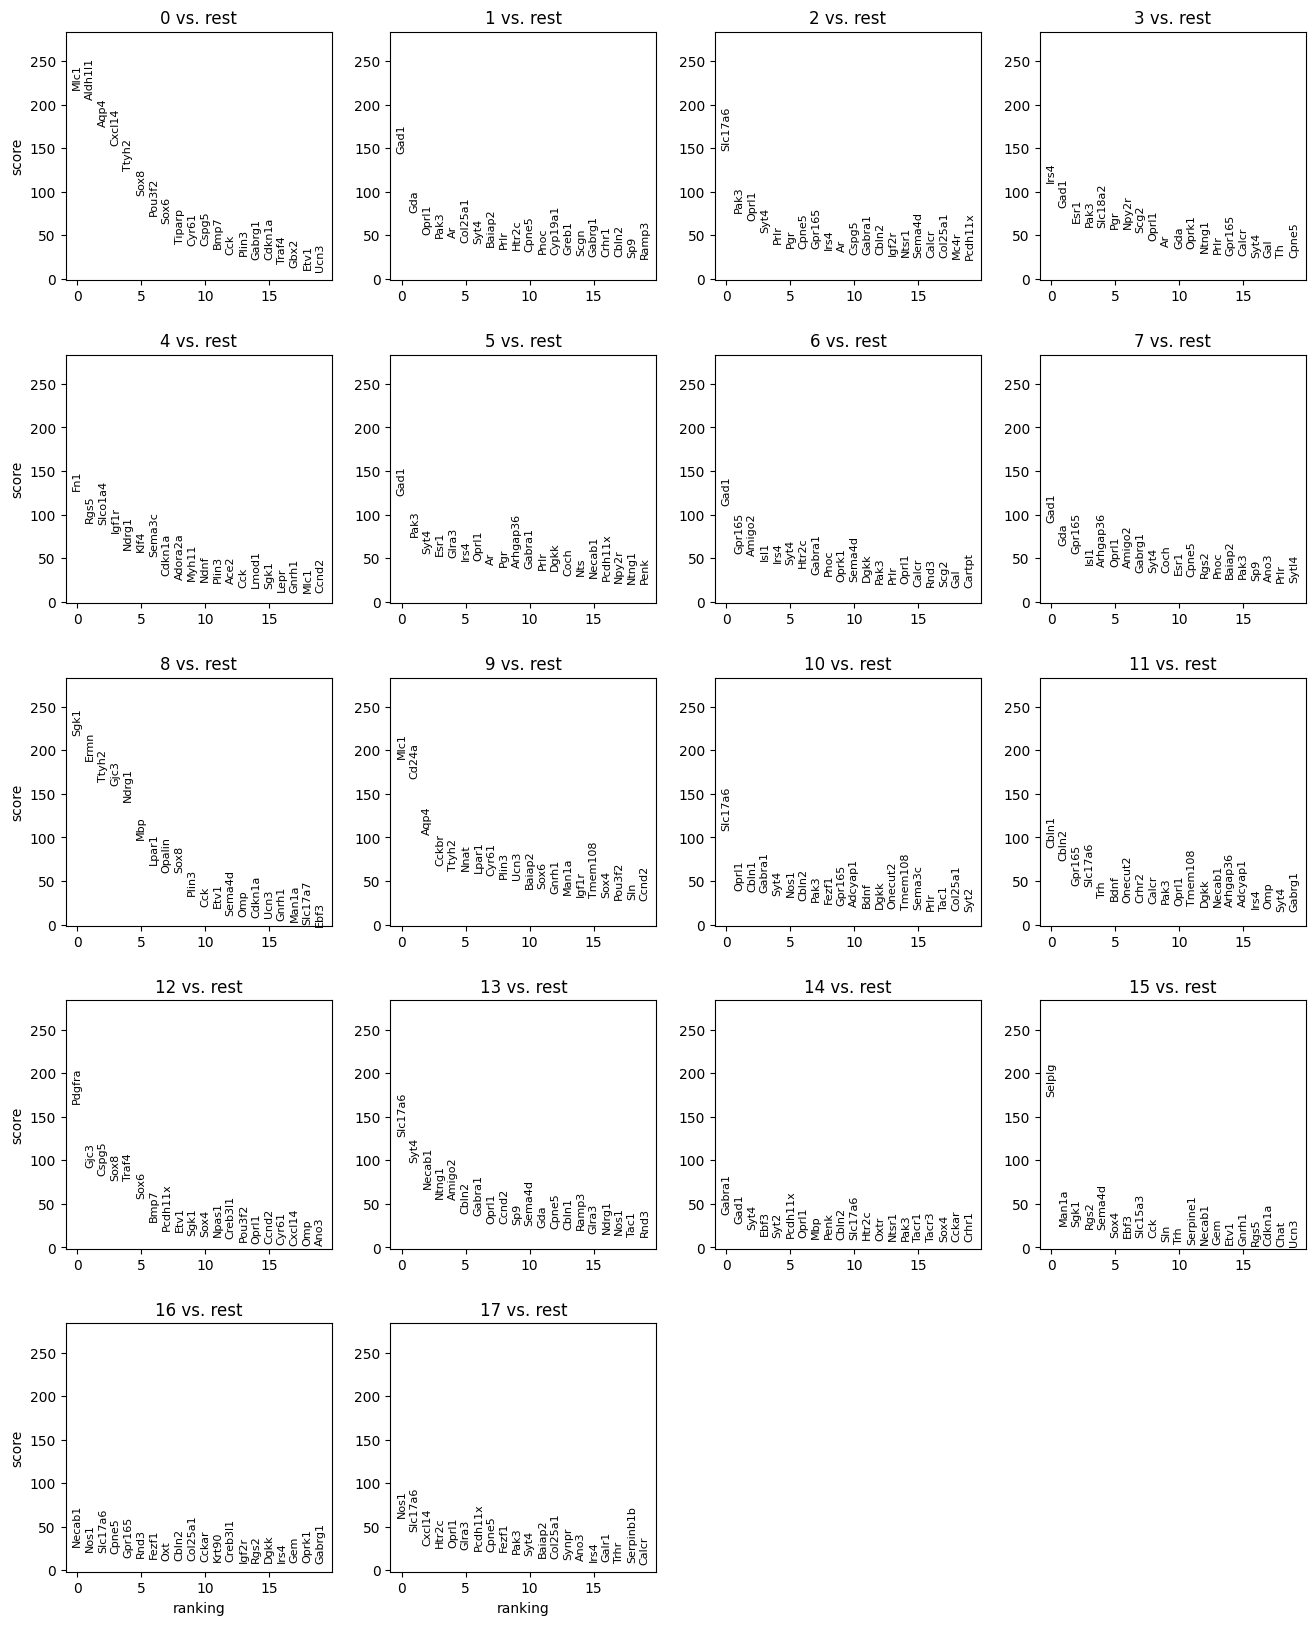

In [42]:
sc.tl.rank_genes_groups(adata, groupby="Leiden")
sc.pl.rank_genes_groups(adata, groupby="Leiden")

In [43]:
list((adata.obs['Cell_class']).unique())

['Endothelial 3',
 'Inhibitory',
 'Endothelial 1',
 'Astrocyte',
 'Excitatory',
 'OD Mature 2',
 'OD Immature 1',
 'Microglia',
 'Pericytes',
 'Endothelial 2',
 'OD Mature 1',
 'OD Mature 4',
 'OD Immature 2',
 'Ependymal',
 'OD Mature 3']

  0%|          | 0/1000 [00:00<?, ?/s]

/opt/conda/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


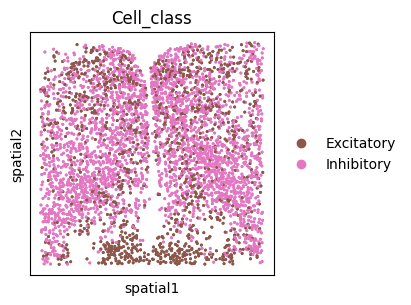

In [44]:
adata_slice = adata[adata.obs.Bregma == -0.14].copy()
sq.gr.spatial_neighbors(adata_slice, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="Cell_class")
sq.pl.spatial_scatter(
    adata_slice,
    color="Cell_class",
    shape=None,
    groups=[
        "Inhibitory",
        "Excitatory"
    ],
    size=5,
)

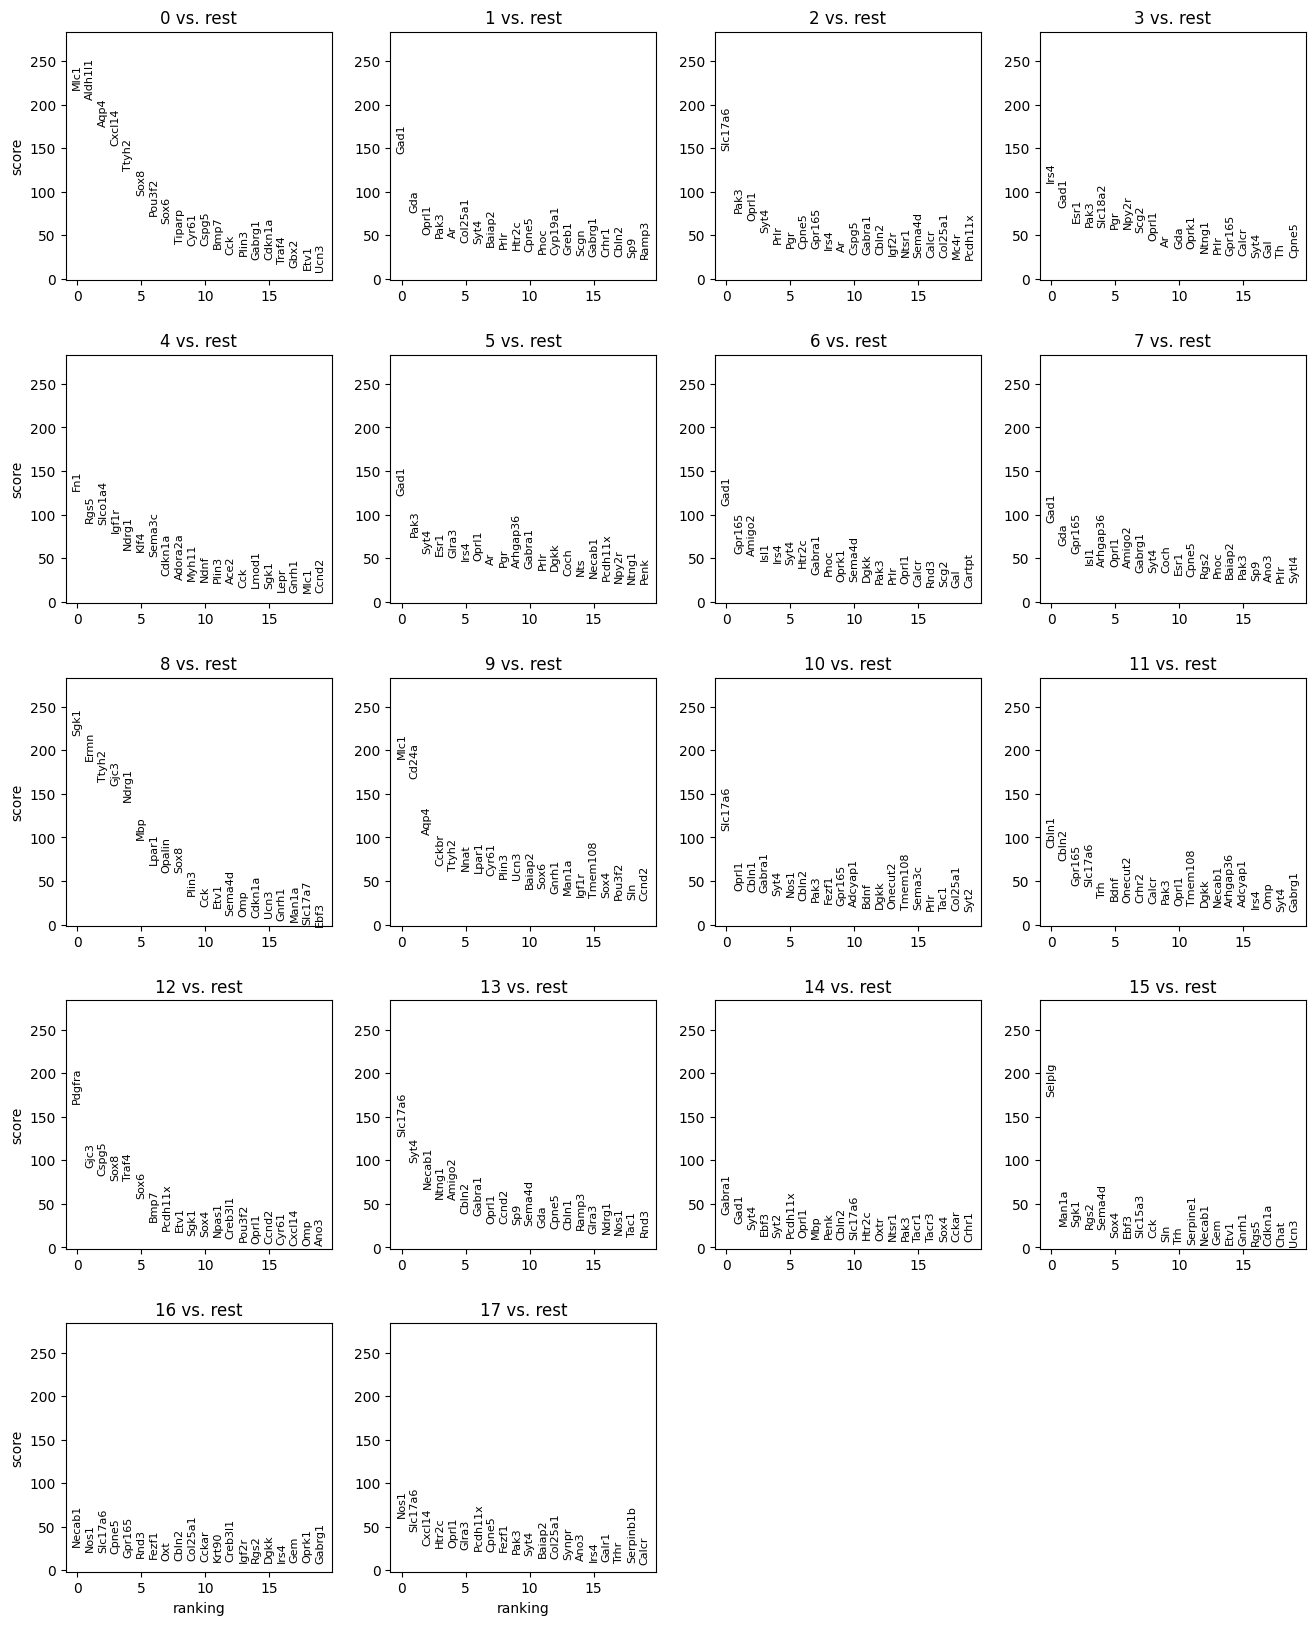

In [45]:
sc.tl.rank_genes_groups(adata, groupby="Leiden")
sc.pl.rank_genes_groups(adata, groupby="Leiden")

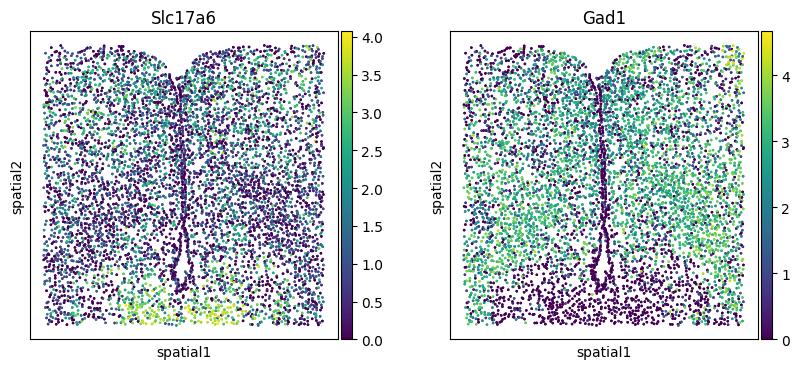

In [46]:
sq.gr.spatial_autocorr(adata_slice, mode="moran")
adata_slice.uns["moranI"].head()
sq.pl.spatial_scatter(
    adata_slice, shape=None, color=["Slc17a6", "Gad1"], size=3
)

In [47]:
l=[]
for i in adata.var_names:
    if 'Gr' in i :
        l.append(i)
l

['Greb1', 'Grpr']

In [48]:
marker_genes_dict = {
    'Excitatory': ['Slc17a6','Slc17a7'],
    'Inhibitory': ['Gad1']
}

categories: 0, 1, 2, etc.
var_group_labels: Excitatory, Inhibitory


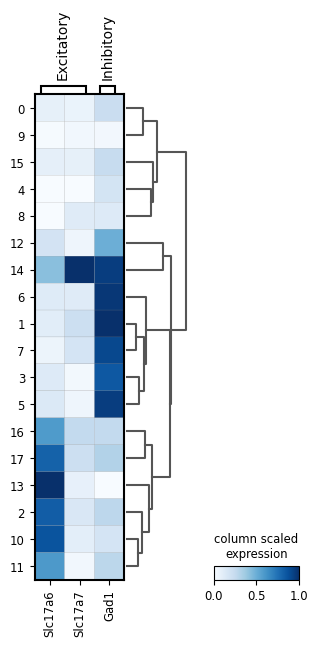

In [49]:
with plt.rc_context({"figure.figsize": (6, 6)}):
    sc.pl.matrixplot(adata, marker_genes_dict, 'Leiden', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

## as defined in the heatmap cluster 16, 17, 13, 2, 10, 11 are Excitatory neruons while clusters 12, 6, 1, 7, 3, 5 are Inhibitory neurons 
## cluster 14 is likely to be hybrid 

In [50]:
# asigning the excitatory and inhibatory to its clusters
# Example of annotating manually based on marker genes
cluster_to_cell_type = {
    '16': 'Excitatory 1',
    '17': 'Excitatory 2',
    '13': 'Excitatory 3',
    '2': 'Excitatory 4',
    '10': 'Excitatory 5',
    '11': 'Excitatory 6',
    '12': 'Inhibitory 1',
    '6': 'Inhibitory 2',
    '1': 'Inhibitory 3',
    '7': 'Inhibitory 4',
    '3': 'Inhibitory 5',
    '5': 'Inhibitory 6',
    '14': 'Hybrid'
}

# Add this information to the AnnData object
adata.obs['Cell_class_2'] = adata.obs['Leiden'].map(cluster_to_cell_type)


/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'Cell_class_2' as categorical
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'Cell_class_2' as categorical
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'Cell_class_2' as categorical
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'Cell_class_2' as categorical
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificat

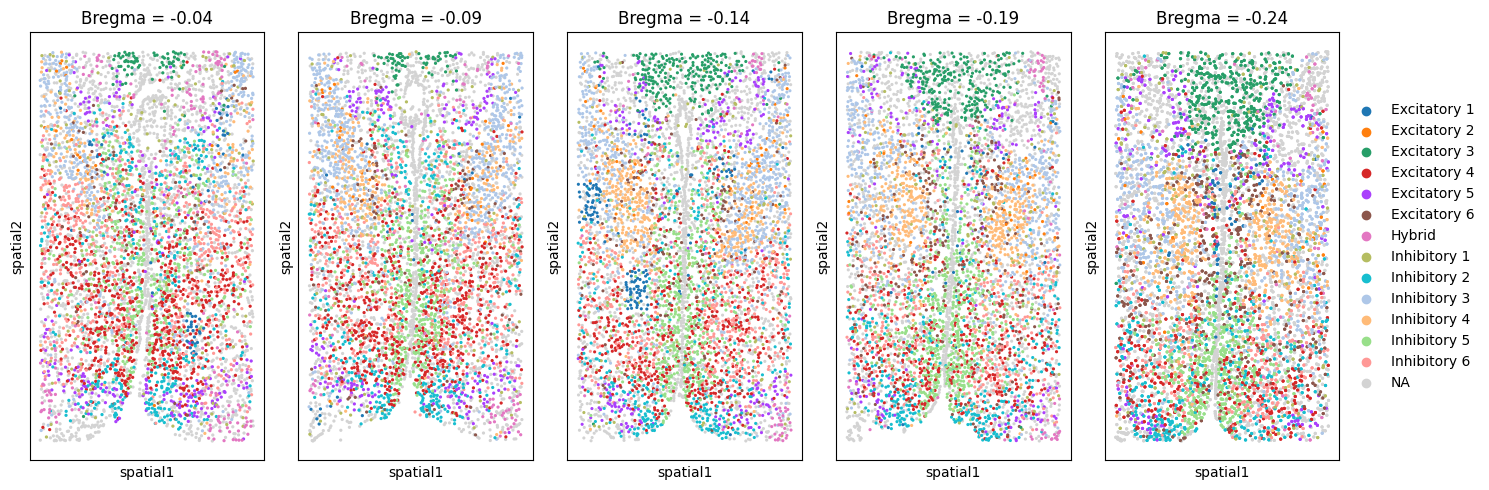

In [51]:
# ploting identified clusters of the paper
bregma_sections = [-0.04, -0.09, -0.14, -0.19, -0.24]

# Create subplots (one column per Bregma section)
fig, axs = plt.subplots(1, len(bregma_sections), figsize=(15, 5))

# Plot each Bregma section
for i, bregma in enumerate(bregma_sections):
    # Filter data for the current Bregma section
    adata_section = adata[adata.obs['Bregma'] == bregma]
    
    # Plot embedding
    sc.pl.embedding(adata_section, basis="spatial", color="Cell_class_2", ax=axs[i], show=False, legend_loc=None)
    
    # Set title for each subplot
    axs[i].set_title(f'Bregma = {bregma}')
    
sc.pl.embedding(adata[adata.obs['Bregma']==-0.24], basis="spatial", color="Cell_class_2", ax=axs[4], show=False)
axs[4].set_title('Bregma = -0.24')
# Adjust layout
plt.tight_layout()
plt.show()

In [52]:
adata_slice

AnnData object with n_obs × n_vars = 5926 × 155
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'n_counts', 'n_genes_by_counts', 'total_counts', 'Leiden'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Leiden', 'Leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'spatial_neighbors', 'Leiden_nhood_enrichment', 'rank_genes_groups', 'Cell_class_colors', 'moranI'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

# ML